In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.max_rows', None)

In [39]:
df = pd.read_excel('data/strava.xlsx', parse_dates=[1])

In [40]:
df.head()

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature
0,791431733,2016-12-02 13:45:43+00:00,Afternoon Ride,12010.5,2329,Ride,NaN,NaN,5.157,10.3,51.2,"[-33.92,18.42]","[-33.98,18.49]",clear-day,Clear,26.05
1,794032933,2016-12-05 06:54:59+00:00,Morning Ride,11943.4,3965,Ride,NaN,NaN,3.012,11.1,56.5,"[-33.98,18.49]","[-33.92,18.42]",clear-day,Clear,23.29
2,794247639,2016-12-05 13:44:33+00:00,Afternoon Ride,12129.5,2412,Ride,NaN,NaN,5.029,10.5,52.3,"[-33.92,18.42]","[-33.98,18.49]",clear-day,Clear,26.88
3,795731385,2016-12-07 05:32:15+00:00,Morning Ride,11911.7,1743,Ride,NaN,NaN,6.834,13.5,57.7,"[-33.98,18.49]","[-33.92,18.42]",partly-cloudy-day,Partly Cloudy,19.59
4,796021123,2016-12-07 13:56:10+00:00,Afternoon Ride,12071.6,1964,Ride,NaN,NaN,6.146,15.0,52.7,"[-33.92,18.42]","[-33.98,18.49]",partly-cloudy-day,Partly Cloudy,25.09


In [41]:
df.dtypes

id                                    int64
start_date              datetime64[ns, UTC]
name                                 object
distance                            float64
moving_time                           int64
type                                 object
average_heartrate                   float64
max_heartrate                       float64
average_speed                       float64
max_speed                           float64
total_elevation_gain                float64
start_latlng                         object
end_latlng                           object
weather_icon                         object
weather_summary                      object
weather_temperature                 float64
dtype: object

In [49]:
new_dates, new_times = zip(*[(d.date(), d.time()) for d in df['start_date']])
df = df.assign(new_date=new_dates, new_time=new_times)

In [139]:
days, months = zip(*[(d.day, d.month for d in df['new_date']])

SyntaxError: invalid syntax (<ipython-input-139-33ca85b07310>, line 1)

In [136]:
df['new_date'][0]

datetime.date(2016, 12, 2)

In [54]:
df['weather_temperature_round'] = round(df.weather_temperature)

In [55]:
df['weather_temperature_round'].value_counts()

20.0    53
19.0    52
21.0    48
18.0    45
22.0    40
15.0    39
17.0    38
16.0    28
14.0    25
23.0    22
26.0    22
24.0    21
12.0    20
25.0    20
11.0    15
27.0    14
28.0    14
13.0    12
10.0    11
7.0      7
30.0     4
9.0      4
32.0     3
29.0     3
33.0     3
6.0      2
31.0     2
8.0      2
3.0      1
Name: weather_temperature_round, dtype: int64

In [57]:
df[df['weather_temperature_round'] == 3.0]

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,new_date,new_time,weather_temperature_round
468,1710032763,2018-07-16 06:21:28+00:00,Morning Ride,8658.6,1571,Ride,147.1,186.0,5.512,12.5,52.5,"[-33.98,18.49]","[-33.93,18.45]",clear-day,Clear,3.24,2018-07-16,06:21:28,3.0


In [56]:
df.head()

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,new_date,new_time,weather_temperature_round
0,791431733,2016-12-02 13:45:43+00:00,Afternoon Ride,12010.5,2329,Ride,NaN,NaN,5.157,10.3,51.2,"[-33.92,18.42]","[-33.98,18.49]",clear-day,Clear,26.05,2016-12-02,13:45:43,26.0
1,794032933,2016-12-05 06:54:59+00:00,Morning Ride,11943.4,3965,Ride,NaN,NaN,3.012,11.1,56.5,"[-33.98,18.49]","[-33.92,18.42]",clear-day,Clear,23.29,2016-12-05,06:54:59,23.0
2,794247639,2016-12-05 13:44:33+00:00,Afternoon Ride,12129.5,2412,Ride,NaN,NaN,5.029,10.5,52.3,"[-33.92,18.42]","[-33.98,18.49]",clear-day,Clear,26.88,2016-12-05,13:44:33,27.0
3,795731385,2016-12-07 05:32:15+00:00,Morning Ride,11911.7,1743,Ride,NaN,NaN,6.834,13.5,57.7,"[-33.98,18.49]","[-33.92,18.42]",partly-cloudy-day,Partly Cloudy,19.59,2016-12-07,05:32:15,20.0
4,796021123,2016-12-07 13:56:10+00:00,Afternoon Ride,12071.6,1964,Ride,NaN,NaN,6.146,15.0,52.7,"[-33.92,18.42]","[-33.98,18.49]",partly-cloudy-day,Partly Cloudy,25.09,2016-12-07,13:56:10,25.0


In [72]:
df.tail()

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,new_date,new_time,weather_temperature_round
565,2719940279,2019-09-17 16:02:09+00:00,Evening Activity,0.0,5868,Workout,156.5,191.0,0.0,0.0,0.0,NaN,NaN,cloudy,Overcast,21.53,2019-09-17,16:02:09,22.0
566,2753579936,2019-09-21 05:10:47+00:00,Morning Activity,0.0,4521,Workout,146.0,192.0,0.0,0.0,0.0,NaN,NaN,cloudy,Overcast,21.53,2019-09-21,05:10:47,22.0
567,2753580445,2019-09-28 05:11:30+00:00,Morning Activity,0.0,4518,Workout,140.4,184.0,0.0,0.0,0.0,NaN,NaN,cloudy,Overcast,21.53,2019-09-28,05:11:30,22.0
568,2756323401,2019-10-01 16:02:21+00:00,Evening Activity,0.0,3111,Workout,160.2,187.0,0.0,0.0,0.0,NaN,NaN,cloudy,Overcast,21.53,2019-10-01,16:02:21,22.0
569,2756323665,2019-10-01 17:04:55+00:00,Evening Activity,0.0,2757,Workout,154.9,186.0,0.0,0.0,0.0,NaN,NaN,cloudy,Overcast,21.53,2019-10-01,17:04:55,22.0


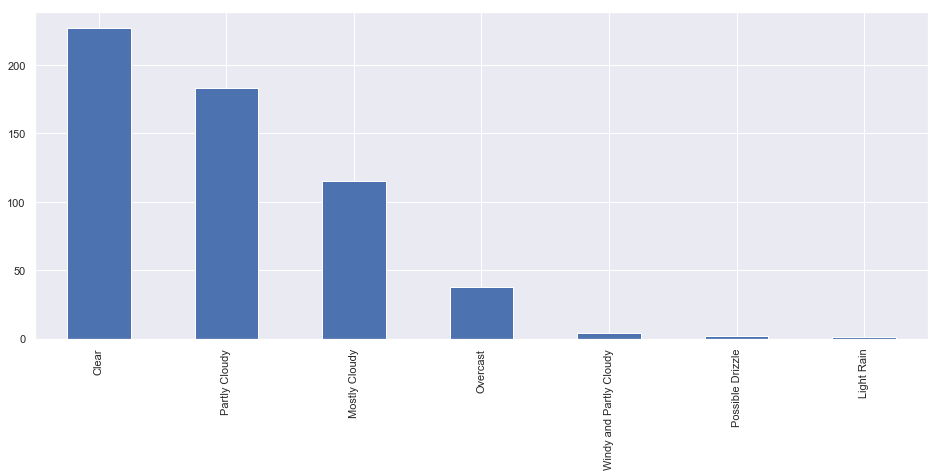

In [208]:
df.weather_summary.value_counts().plot(kind='bar')

In [12]:
df.name.value_counts()

Morning Ride                   257
Afternoon Ride                 231
Morning Run                     21
Evening Run                     11
Evening Activity                 9
Afternoon Activity               8
Lunch Ride                       6
Afternoon Run                    5
Morning Activity                 5
Evening Ride                     4
Morning Solo Run                 1
Running from the devil           1
Night Activity                   1
1st TT for 2019                  1
Night Activity - It              1
FKT 3.0 take two                 1
Morning chillin Ride             1
Cool Morning Ride                1
Morning Ride with roadsters      1
Batrun Recce                     1
Afternoon burrrn                 1
Celtics trail Run                1
afternoon Ride                   1
Name: name, dtype: int64

In [73]:
activity_ride = ['Morning Ride', 'Afternoon Ride', 'Lunch Ride', 'Evening Ride', 'Morning chillin Ride', 'Cool Morning Ride', 'Morning Ride with roadsters', 'afternoon Ride']

In [74]:
rides = df[df.name.isin(activity_ride)]

In [114]:
# filtering to include 2 "full" years
rides = rides[(rides.start_date > '2017-01-01 00:00') & (rides.start_date < '2019-01-01 00:00')]

In [115]:
rides.tail()

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,new_date,new_time,weather_temperature_round
543,1973097829,2018-11-16 14:18:19+00:00,Afternoon Ride,3666.9,628,Ride,155.6,184.0,5.839,14.2,24.8,"[-33.99,18.5]","[-33.98,18.49]",partly-cloudy-day,Mostly Cloudy,21.24,2018-11-16,14:18:19,21.0
544,2113085260,2018-11-19 06:25:47+00:00,Morning Ride,8734.0,1534,Ride,144.3,188.0,5.694,12.4,55.8,"[-33.98,18.49]","[-33.93,18.45]",partly-cloudy-day,Mostly Cloudy,20.48,2018-11-19,06:25:47,20.0
545,2113085274,2018-11-19 14:54:27+00:00,Afternoon Ride,8632.7,1416,Ride,140.3,180.0,6.097,13.4,70.9,"[-33.93,18.45]","[-33.98,18.49]",clear-day,Clear,21.18,2018-11-19,14:54:27,21.0
546,2113085319,2018-11-21 06:43:44+00:00,Morning Ride,8690.4,1464,Ride,133.6,173.0,5.936,14.5,55.6,"[-33.98,18.49]","[-33.93,18.45]",partly-cloudy-day,Mostly Cloudy,17.99,2018-11-21,06:43:44,18.0
547,2113085283,2018-11-21 14:44:25+00:00,Afternoon Ride,8653.5,1702,Ride,127.1,180.0,5.084,10.2,71.7,"[-33.93,18.45]","[-33.98,18.49]",partly-cloudy-day,Windy and Partly Cloudy,18.16,2018-11-21,14:44:25,18.0


C:\Users\WaheebA\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:223: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  X, y = np.c_[np.ones(len(self.x)), self.x], self.y


TypeError: invalid type promotion

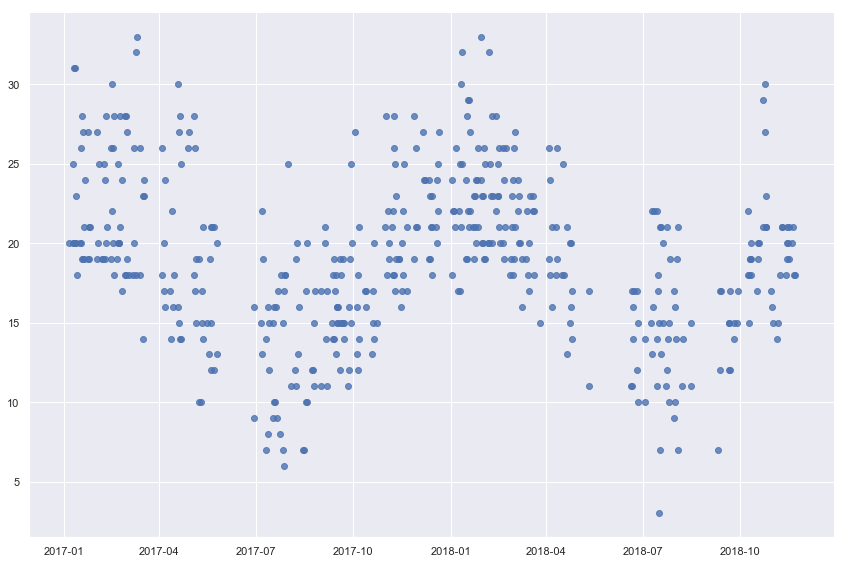

In [118]:
sns.lmplot(x='start_date', y='weather_temperature_round', data=rides, height=8, aspect=1.5)

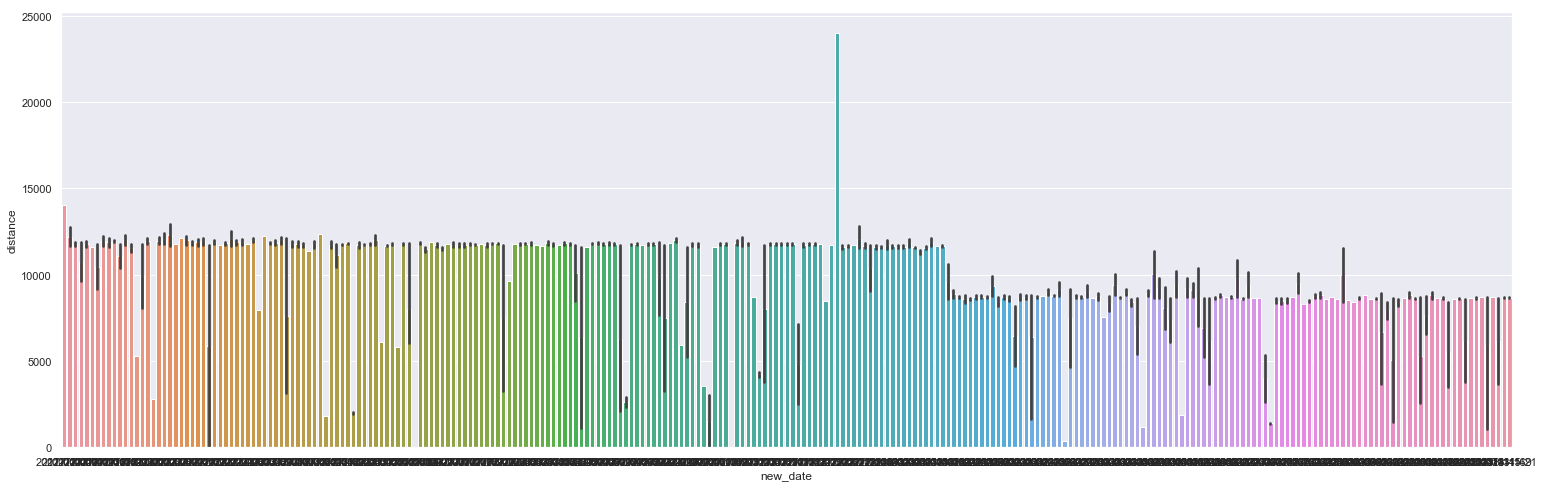

In [116]:
fig, ax = plt.subplots(figsize=(26,8))
sns.barplot(x='new_date', y='distance', data=rides, ax=ax)

In [96]:
rides[rides.distance==rides.distance.max()]

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,new_date,new_time,weather_temperature_round
295,1309048146,2017-12-07 05:30:00+00:00,Morning Ride,24000.0,3300,Ride,NaN,NaN,7.273,0.0,0.0,NaN,NaN,partly-cloudy-day,Mostly Cloudy,23.51,2017-12-07,05:30:00,24.0


In [98]:
rides.new_date.nunique()

273

In [99]:
rides.new_date.min()

datetime.date(2016, 12, 2)

In [100]:
rides.new_date.max()

datetime.date(2019, 1, 20)

In [119]:
3300/60

55.0

In [145]:
rides['month'] = [d.strftime('%B') for d in rides['new_date']]

In [147]:
rides['day_num'] = [d.day for d in rides['new_date']]

In [184]:
rides['month_num'] = [d.month for d in rides['new_date']]

In [148]:
import calendar

In [156]:
.reset_index()

In [158]:
rides.tail()

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,new_date,new_time,weather_temperature_round,month,day_num,DoW
543,1973097829,2018-11-16 14:18:19+00:00,Afternoon Ride,3666.9,628,Ride,155.6,184.0,5.839,14.2,24.8,"[-33.99,18.5]","[-33.98,18.49]",partly-cloudy-day,Mostly Cloudy,21.24,2018-11-16,14:18:19,21.0,November,16,Friday
544,2113085260,2018-11-19 06:25:47+00:00,Morning Ride,8734.0,1534,Ride,144.3,188.0,5.694,12.4,55.8,"[-33.98,18.49]","[-33.93,18.45]",partly-cloudy-day,Mostly Cloudy,20.48,2018-11-19,06:25:47,20.0,November,19,Monday
545,2113085274,2018-11-19 14:54:27+00:00,Afternoon Ride,8632.7,1416,Ride,140.3,180.0,6.097,13.4,70.9,"[-33.93,18.45]","[-33.98,18.49]",clear-day,Clear,21.18,2018-11-19,14:54:27,21.0,November,19,Monday
546,2113085319,2018-11-21 06:43:44+00:00,Morning Ride,8690.4,1464,Ride,133.6,173.0,5.936,14.5,55.6,"[-33.98,18.49]","[-33.93,18.45]",partly-cloudy-day,Mostly Cloudy,17.99,2018-11-21,06:43:44,18.0,November,21,Wednesday
547,2113085283,2018-11-21 14:44:25+00:00,Afternoon Ride,8653.5,1702,Ride,127.1,180.0,5.084,10.2,71.7,"[-33.93,18.45]","[-33.98,18.49]",partly-cloudy-day,Windy and Partly Cloudy,18.16,2018-11-21,14:44:25,18.0,November,21,Wednesday


In [189]:
# filtering only 2017
rides2017 = rides[rides.start_date < '2018-01-01 00:00']

In [194]:
def plot_daily_heatgram(df):
    daily_rides_dist = df.groupby( ['month_num', 'day_num'])['distance'].sum().to_frame().reset_index()
    daily_rides_dist_pivot = daily_rides_dist.pivot('month_num', 'day_num', 'distance')
    f, ax = plt.subplots(figsize=(18, 6))
    sns.heatmap(daily_rides_dist_pivot, ax=ax, cmap="YlGnBu", vmax=32000)

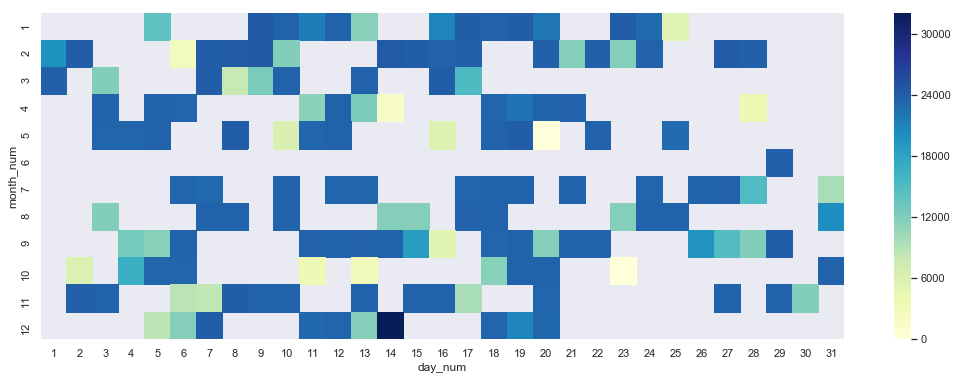

In [195]:
plot_daily_heatgram(rides2017)

In [203]:
rides2017[(rides2017.start_date > '2017-12-13 00:00') & (rides2017.start_date < '2017-12-15 00:00')]

,id,start_date,name,distance,moving_time,type,average_heartrate,max_heartrate,average_speed,max_speed,total_elevation_gain,start_latlng,end_latlng,weather_icon,weather_summary,weather_temperature,new_date,new_time,weather_temperature_round,month,day_num,DoW,month_num
300,1313715658,2017-12-13 13:43:51+00:00,Afternoon Ride,11725.7,1979,Ride,117.4,177.0,5.925,13.5,118.6,"[-33.92,18.42]","[-33.98,18.49]",partly-cloudy-day,Mostly Cloudy,20.53,2017-12-13,13:43:51,21.0,December,13,Wednesday,12
301,1313487970,2017-12-14 06:00:00+00:00,Morning Ride,11850.0,2100,Ride,NaN,NaN,5.643,0.0,0.0,NaN,NaN,partly-cloudy-day,Mostly Cloudy,20.53,2017-12-14,06:00:00,21.0,December,14,Thursday,12
302,1313715659,2017-12-14 06:18:25+00:00,Morning Ride,11540.9,1868,Ride,147.5,178.0,6.178,13.9,96.6,"[-33.98,18.49]","[-33.92,18.42]",partly-cloudy-day,Partly Cloudy,18.38,2017-12-14,06:18:25,18.0,December,14,Thursday,12
303,1313715700,2017-12-14 12:22:59+00:00,Afternoon Ride,12806.5,2598,Ride,151.2,186.0,4.929,15.1,143.8,"[-33.92,18.42]","[-33.98,18.49]",partly-cloudy-day,Partly Cloudy,22.51,2017-12-14,12:22:59,23.0,December,14,Thursday,12


In [192]:
# filtering only 2018
rides2018 = rides[rides.start_date > '2018-01-01 00:00']

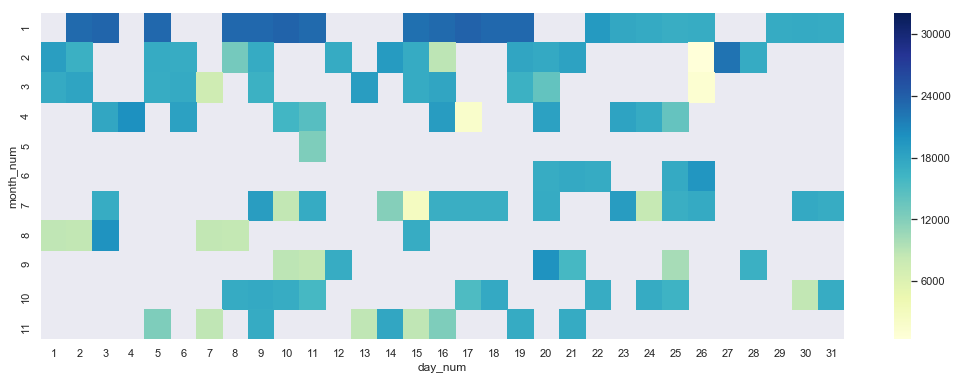

In [196]:
plot_daily_heatgram(rides2018)

In [219]:
rides_count = rides.groupby('new_date').agg({'distance':['count','sum']})

In [222]:
rides_count.head()

distance         
              count      sum
new_date                    
2017-01-05        1  14068.4
2017-01-09        2  24404.1
2017-01-10        2  23556.1
2017-01-11        2  21530.8
2017-01-12        2  23533.6

In [220]:
rides_count.columns

MultiIndex(levels=[['distance'], ['count', 'sum']],
           codes=[[0, 0], [0, 1]])

In [221]:
rides_count.columns.values

array([('distance', 'count'), ('distance', 'sum')], dtype=object)

In [225]:
rides_count.columns = [' '.join(col).strip() for col in rides_count.columns.values]

In [226]:
rides_count.head()

,distance count,distance sum
new_date,,
2017-01-05,1,14068.4
2017-01-09,2,24404.1
2017-01-10,2,23556.1
2017-01-11,2,21530.8
2017-01-12,2,23533.6


In [238]:
incomplete_rides = rides_count[(rides_count['distance count']<2) & (rides_count['distance sum'] < 5000)].reset_index()

In [242]:
incomplete_rides.new_date[0].weekday()

0

In [228]:
rides_count[(rides_count['distance count']<2)]

,distance count,distance sum
new_date,,
2017-01-05,1,14068.4
2017-01-13,1,11607.9
2017-01-25,1,5265.9
2017-02-06,1,2782.5
2017-02-10,1,11792.2
2017-02-23,1,11735.4
2017-03-03,1,11789.3
2017-03-08,1,7978.0
2017-03-09,1,12252.0


In [234]:
rides2017.groupby('DoW',sort=False)['distance'].agg(['count', 'sum', 'mean', 'min', 'max'])

,count,sum,mean,min,max
DoW,,,,,
Thursday,65,780403.6,12006.209231,8483.0,24000.0
Monday,48,522327.7,10881.827083,17.0,12747.4
Tuesday,41,440695.4,10748.668293,0.0,12235.5
Wednesday,54,579170.2,10725.374074,3270.4,12418.4
Friday,54,525990.8,9740.570370,4.4,12121.7
Saturday,3,5234.6,1744.866667,0.0,2906.2


In [235]:
rides2018.groupby('DoW',sort=False)['distance'].agg(['count', 'sum', 'mean', 'min', 'max'])

,count,sum,mean,min,max
DoW,,,,,
Tuesday,48,415823.9,8662.997917,1450.7,11715.5
Wednesday,52,448259.0,8620.365385,1056.4,12104.5
Friday,37,326097.0,8813.432432,3666.9,11745.6
Monday,43,371278.8,8634.390698,388.1,11705.2
Thursday,33,269932.8,8179.781818,2551.4,11672.7
Saturday,3,11987.1,3995.700000,2650.4,6670.0
Sunday,2,2793.8,1396.900000,1364.1,1429.7
